In [13]:
from keras.layers import Rescaling ,Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [14]:
train_data = image_dataset_from_directory("Face Mask Dataset/Train", image_size=(224,224), batch_size=8)
test_data = image_dataset_from_directory("Face Mask Dataset/Test", image_size=(224,224), batch_size=8)
valid_data = image_dataset_from_directory("Face Mask Dataset/Validation", image_size=(224,224), batch_size=8)

Found 10000 files belonging to 2 classes.
Found 992 files belonging to 2 classes.
Found 800 files belonging to 2 classes.


2023-03-15 14:21:04.858080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-03-15 14:21:04.858501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_4}}]]


tf.Tensor([1 1 1 1 1 0 1 1], shape=(8,), dtype=int32)
tf.Tensor(
[[[ 6.      5.      3.    ]
  [ 5.75    4.75    2.75  ]
  [ 5.25    4.25    2.25  ]
  ...
  [20.     16.     13.    ]
  [20.     16.     13.    ]
  [20.     16.     13.    ]]

 [[ 5.5     4.5     2.5   ]
  [ 5.3125  4.3125  2.3125]
  [ 4.9375  3.9375  1.9375]
  ...
  [19.3125 15.3125 12.3125]
  [19.4375 15.4375 12.4375]
  [19.5    15.5    12.5   ]]

 [[ 4.5     3.5     1.5   ]
  [ 4.4375  3.4375  1.4375]
  [ 4.3125  3.3125  1.3125]
  ...
  [17.9375 13.9375 10.9375]
  [18.3125 14.3125 11.3125]
  [18.5    14.5    11.5   ]]

 ...

 [[23.5    19.5    18.5   ]
  [23.125  19.125  18.125 ]
  [22.375  18.375  17.375 ]
  ...
  [13.      3.      2.    ]
  [13.      3.      2.    ]
  [13.      3.      2.    ]]

 [[24.5    20.5    19.5   ]
  [23.875  19.875  18.875 ]
  [22.625  18.625  17.625 ]
  ...
  [13.      3.      2.    ]
  [13.      3.      2.    ]
  [13.      3.      2.    ]]

 [[25.     21.     20.    ]
  [24.25   20.25   19

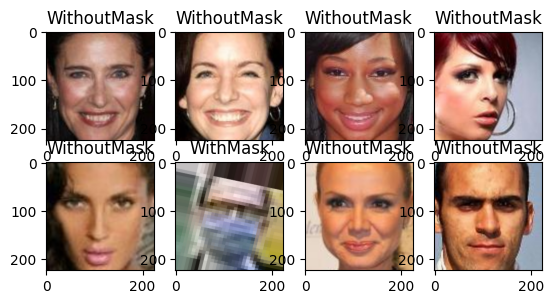

In [32]:
CLASSES = train_data.class_names
for rasm,label in train_data.take(1):
    print(label)
    print(rasm[0])
    print("Train data : ")
    for i in range(8):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(rasm[i].numpy().astype("uint8"))
        plt.title(CLASSES[label[i]])
        
plt.show()

In [24]:
model = Sequential([
    Rescaling(1./255),
    
    Conv2D(4, (3,3), padding="same", activation="relu"), # 4 224 224
    BatchNormalization(),
    MaxPool2D((2,2)), # 4 112 112
    Dropout(0.2),
    
    Conv2D(8, (3,3), padding="same", activation="relu") ,
    BatchNormalization(),
    MaxPool2D((2,2)) ,
    Dropout(0.2),
    
    Conv2D(16, (3,3), padding="same", activation="relu") ,
    BatchNormalization(),
    MaxPool2D((2,2)) ,
    Dropout(0.2),
    
    Conv2D(32, (3,3), padding="same", activation="relu") ,
    BatchNormalization(),
    MaxPool2D((2,2)) ,
    Dropout(0.2),
    
    Conv2D(64, (3,3), padding="same", activation="relu") ,
    BatchNormalization(),
    MaxPool2D((2,2)) ,
    Dropout(0.2),
    
    Flatten(),
    
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(2, activation="sigmoid")
    
])

In [25]:
loss  = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam()

In [26]:
model.build(input_shape=(8,224,224,3))
model.summary()
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (8, 224, 224, 3)          0         
                                                                 
 conv2d_14 (Conv2D)          (8, 224, 224, 4)          112       
                                                                 
 batch_normalization_20 (Bat  (8, 224, 224, 4)         16        
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (8, 112, 112, 4)         0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (8, 112, 112, 4)          0         
                                                                 
 conv2d_15 (Conv2D)          (8, 112, 112, 8)         

In [28]:
model.fit(train_data, validation_data=valid_data, epochs=10)

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9123

2023-03-15 14:02:49.378469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [800]
	 [[{{node Placeholder/_4}}]]
2023-03-15 14:02:49.378802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [800]
	 [[{{node Placeholder/_4}}]]


1250/1250 [==============================] - 112s 90ms/step - loss: 0.2388 - accuracy: 0.9123 - val_loss: 0.0953 - val_accuracy: 0.9688
Epoch 2/10
1250/1250 [==============================] - 119s 95ms/step - loss: 0.1652 - accuracy: 0.9477 - val_loss: 0.9131 - val_accuracy: 0.7075
Epoch 3/10
1250/1250 [==============================] - 115s 92ms/step - loss: 0.1484 - accuracy: 0.9550 - val_loss: 0.1198 - val_accuracy: 0.9613
Epoch 4/10
1250/1250 [==============================] - 114s 91ms/step - loss: 0.1216 - accuracy: 0.9640 - val_loss: 0.1281 - val_accuracy: 0.9613
Epoch 5/10
1250/1250 [==============================] - 114s 91ms/step - loss: 0.1383 - accuracy: 0.9578 - val_loss: 0.0960 - val_accuracy: 0.9787
Epoch 6/10
1250/1250 [==============================] - 116s 93ms/step - loss: 0.1069 - accuracy: 0.9678 - val_loss: 0.0705 - val_accuracy: 0.9812
Epoch 7/10
1250/1250 [==============================] - 115s 92ms/step - loss: 0.0933 - accuracy: 0.9732 - val_loss: 0.1819 - val

In [29]:
model.save("model.h5")

In [31]:
model.evaluate(test_data)

124/124 [==============================] - 4s 33ms/step - loss: 0.1028 - accuracy: 0.9728


[0.10280649363994598, 0.9727822542190552]